In [1]:
import numpy as np
np.random.seed(3) 
import matplotlib.pyplot as plt
from utils import plt_linefit
from homomorphic_encryption import encryption_train, decryption_train, encryption_test, decryption_test

## Generate Data

In [2]:
# Generate dataset
X = np.matrix(np.expand_dims(np.arange(200), 1))
y = X + np.random.random((200, 1)) * 10


# use sklearn's built-in function to create train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.array([[1,xi.item()] for xi in X_train])
X_test = np.array([[1,xi.item()] for xi in X_test])

[Text(0.5, 0, 'Feature'), Text(0, 0.5, 'Label'), Text(0.5, 1.0, 'Test Set')]

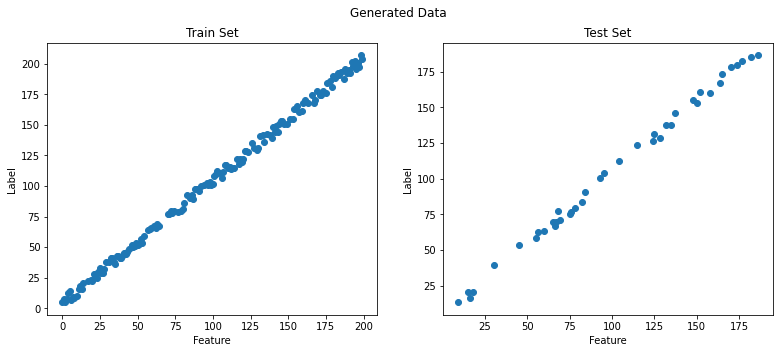

In [3]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13, 5))
fig.suptitle("Generated Data")
ax1.scatter(X_train.T.tolist()[1], y_train.T.tolist()[0])
ax1.set(xlabel = 'Feature', ylabel = 'Label',title = 'Train Set')
ax2.scatter(X_test.T.tolist()[1], y_test.T.tolist()[0])
ax2.set(xlabel = 'Feature', ylabel = 'Label',title = 'Test Set')

## Encrypt Train Set

In [4]:
H_enc = encryption_train(X_train,y_train)
H_dec = decryption_train(H_enc[0],H_enc[1],H_enc[2],H_enc[3])
# Encrypted train set:
train_X_enc = H_enc[0] # Encrypted train label
train_y_enc = H_enc[1] # Encrypted train feature

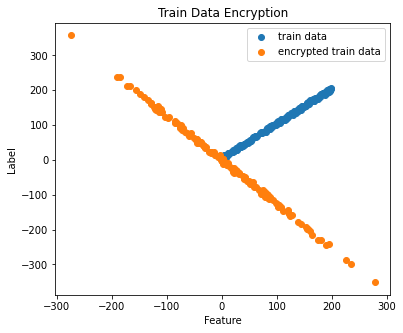

In [5]:
plt.figure(figsize=(6, 5))
plt.scatter(X_train.T.tolist()[1], y_train.T.tolist()[0], label="train data")
plt.scatter(train_X_enc.T.tolist()[1], train_y_enc.T.tolist()[0], label="encrypted train data")
plt.title("Train Data Encryption")
plt.xlabel("Feature")
plt.ylabel("Label")
plt.legend()
plt.show()

## Train Linear Regression

In [6]:
from sklearn import linear_model
# Use linear regression model to fit dataf
model = linear_model.LinearRegression(fit_intercept=False)
# Train the linear regression model with encrypted train set
model.fit(train_X_enc, train_y_enc)
beta_hat= np.asmatrix(model.coef_[0]).reshape((2, 1)) # coefficients after training

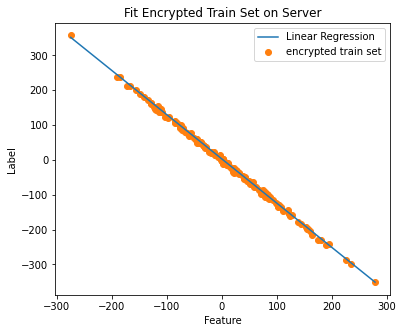

In [7]:
plt.figure(figsize=(6, 5))
plt.scatter(train_X_enc.T.tolist()[1], train_y_enc.T.tolist()[0], label="encrypted train set", c='#ff7f0e')
plt.plot([np.min(train_X_enc[:,1]), np.max(train_X_enc[:,1])], plt_linefit(train_X_enc,beta_hat), label="Linear Regression")
plt.title("Fit Encrypted Train Set on Server")
plt.xlabel("Feature")
plt.ylabel("Label")
plt.legend()
plt.show()

## Test Set Prediction

### Server-side: Prediction makes no sense

In [12]:
# Get encrypted test set
H = encryption_test(X_test,H_enc[3])
test_X_enc = H[0]
# Server makes prediction on encrypted test set feature
test_y_enc = test_X_enc.dot(beta_hat)

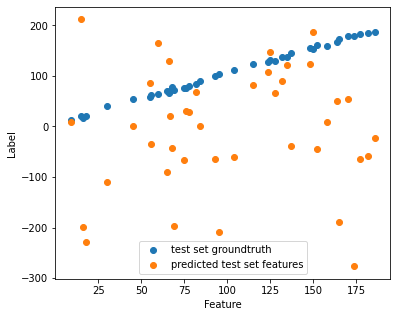

In [13]:
plt.figure(figsize=(6, 5))
plt.scatter(X_test.T.tolist()[1], y_test.T.tolist()[0], label="test set groundtruth")
plt.scatter(X_test.T.tolist()[1], test_y_enc.T.tolist()[0], label="predicted test set features")
plt.xlabel("Feature")
plt.ylabel("Label")
plt.legend()
plt.show()

### User-side: Decrypts Useful Prediction

In [14]:
# User decrypt server's predictions
test_y_dec = decryption_test(test_y_enc,H[1])

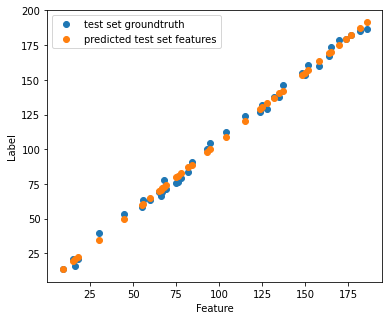

In [15]:
plt.figure(figsize=(6, 5))
plt.scatter(X_test.T.tolist()[1], y_test.T.tolist()[0], label="test set groundtruth")
plt.scatter(X_test.T.tolist()[1], test_y_dec.T.tolist()[0], label="predicted test set features")
plt.xlabel("Feature")
plt.ylabel("Label")
plt.legend()
plt.show()